In [ ]:
# %%

import torch
from util.gpu_info import gpuInfo
from util.data_augmentation import data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import test
from util.data_load import data_load

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *
from networks.DLinkNet152 import *
from networks.LinkNet152 import *

training_data_processing = False
model_training = True
model_validation = True
model_loading = False

batch_size = 4

path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/LinkNet152.model"

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

gpu_info = gpuInfo()

model = LinkNet152()
if cuda_available:
    model.cuda()

print(model)

Tue Jan 21 13:35:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   43C    P0             17W /  340W |     488MiB /  16376MiB |     25%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LinkNet152(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256,

In [ ]:
# %%

if training_data_processing:
    training_resize = 512
    training_number = 367
    testing_resize = int(608 * training_resize / 400)
    if testing_resize % 2 == 1:
        testing_resize += 1

    data_augmentation(
        training_resize,
        training_number,
        testing_resize,
    )

In [ ]:
# %%

if not model_loading:
    training_generator, validation_generator = data_load(
        path_data, model_validation, batch_size
    )


 Fim do Carregamento Training Data

 Fim do Carregamento Validation Data

 Fim do Carregamento


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.39402174949645996
→ ACC for Batch 1: 0.939631462097168
→ Recall for Batch 1: 0.034205744524849375
→ Running_loss for Batch 21: 0.3901524543762207
→ ACC for Batch 21: 0.9786186218261719
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.37662771344184875
→ ACC for Batch 41: 0.9871377944946289
→ Recall for Batch 41: 0.0
→ Running_loss for Batch 61: 0.30179789662361145
→ ACC for Batch 61: 0.9802074432373047
→ Recall for Batch 61: 0.0
→ Running_loss for Batch 81: 0.29378393292427063
→ ACC for Batch 81: 0.959263801574707
→ Recall for Batch 81: 0.0
→ Running_loss for Batch 101: 0.3173627555370331
→ ACC for Batch 101: 0.9837551116943359
→ Recall for Batch 101: 0.0
→ Running_loss for Batch 121: 0.29903602600097656
→ ACC for Batch 121: 0.9588899612426758
→ Recall for Batch 121: 0.4349004415961229
→ Running_loss for Batch 141: 0.32618066668510437
→ ACC for Batch 141: 0.9821043014526367
→ Recall for Batch 141: 

  1%|          | 1/100 [09:32<15:43:54, 572.06s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.15978828072547913
→ ACC for Batch 1: 0.9756479263305664
→ Recall for Batch 1: 0.752647622025089
→ Running_loss for Batch 21: 0.22443604469299316
→ ACC for Batch 21: 0.9585199356079102
→ Recall for Batch 21: 0.49218351741716226
→ Running_loss for Batch 41: 0.2101956307888031
→ ACC for Batch 41: 0.9753932952880859
→ Recall for Batch 41: 0.6816846514063
→ Running_loss for Batch 61: 0.1749337613582611
→ ACC for Batch 61: 0.9874534606933594
→ Recall for Batch 61: 0.7084776891931377
→ Running_loss for Batch 81: 0.1602036952972412
→ ACC for Batch 81: 0.9728879928588867
→ Recall for Batch 81: 0.7393788303729095
→ Running_loss for Batch 101: 0.1625531017780304
→ ACC for Batch 101: 0.9860191345214844
→ Recall for Batch 101: 0.8443106704438149
→ Running_loss for Batch 121: 0.1688089668750763
→ ACC for Batch 121: 0.9791688919067383
→ Recall for Batch 121: 0.689805568946124
→ Running_loss for Batch 141: 0.17848432064056

  2%|▏         | 2/100 [17:33<14:07:42, 519.00s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.16205289959907532
→ ACC for Batch 1: 0.9889316558837891
→ Recall for Batch 1: 0.7257743315961188
→ Running_loss for Batch 21: 0.1422722190618515
→ ACC for Batch 21: 0.9732046127319336
→ Recall for Batch 21: 0.7541861628557135
→ Running_loss for Batch 41: 0.24941907823085785
→ ACC for Batch 41: 0.9850873947143555
→ Recall for Batch 41: 0.6665971787923007
→ Running_loss for Batch 61: 0.1648544818162918
→ ACC for Batch 61: 0.9863519668579102
→ Recall for Batch 61: 0.718455810032317
→ Running_loss for Batch 81: 0.14043185114860535
→ ACC for Batch 81: 0.9893531799316406
→ Recall for Batch 81: 0.856198347107438
→ Running_loss for Batch 101: 0.18768756091594696
→ ACC for Batch 101: 0.9799680709838867
→ Recall for Batch 101: 0.6398232458489556
→ Running_loss for Batch 121: 0.15887203812599182
→ ACC for Batch 121: 0.9784917831420898
→ Recall for Batch 121: 0.6754118364856619
→ Running_loss for Batch 141: 0.114200033

  3%|▎         | 3/100 [27:01<14:34:49, 541.12s/it]

Validation loss for Epoch 3: 0.21437014639377594

Acurácia de validação:  0.9811501957121349
F1-score de validação:  0.6607033242720896
IoU de validação:  0.9684613331303832
Recall de validação:  0.7212999220083388

---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.235399067401886
→ ACC for Batch 1: 0.9823055267333984
→ Recall for Batch 1: 0.4876416258460158
→ Running_loss for Batch 21: 0.14407210052013397
→ ACC for Batch 21: 0.9926824569702148
→ Recall for Batch 21: 0.7620347671049699
→ Running_loss for Batch 41: 0.19708766043186188
→ ACC for Batch 41: 0.9816465377807617
→ Recall for Batch 41: 0.6250117595409075
→ Running_loss for Batch 61: 0.17390176653862
→ ACC for Batch 61: 0.9802942276000977
→ Recall for Batch 61: 0.7219368062395187
→ Running_loss for Batch 81: 0.15570275485515594
→ ACC for Batch 81: 0.9849863052368164
→ Recall for Batch 81: 0.8500017072421211
→ Running_loss for Batch 101: 0.12755729258060455
→ ACC for Batch 101: 0.9841747283935547
→ R

  4%|▍         | 4/100 [35:32<14:06:34, 529.11s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.15959683060646057
→ ACC for Batch 1: 0.9836311340332031
→ Recall for Batch 1: 0.7815978456014363
→ Running_loss for Batch 21: 0.16466492414474487
→ ACC for Batch 21: 0.9857664108276367
→ Recall for Batch 21: 0.7423236514522822
→ Running_loss for Batch 41: 0.1247476264834404
→ ACC for Batch 41: 0.9898519515991211
→ Recall for Batch 41: 0.8544267053701016
→ Running_loss for Batch 61: 0.13409321010112762
→ ACC for Batch 61: 0.9901962280273438
→ Recall for Batch 61: 0.8180441539810314
→ Running_loss for Batch 81: 0.13872624933719635
→ ACC for Batch 81: 0.9879369735717773
→ Recall for Batch 81: 0.8230340940335441
→ Running_loss for Batch 101: 0.15406857430934906
→ ACC for Batch 101: 0.9868965148925781
→ Recall for Batch 101: 0.7820745001953056
→ Running_loss for Batch 121: 0.14870098233222961
→ ACC for Batch 121: 0.9856061935424805
→ Recall for Batch 121: 0.7486066123902069
→ Running_loss for Batch 141: 0.161803

  5%|▌         | 5/100 [43:44<13:36:54, 515.94s/it]

Validation loss for Epoch 5: 0.17355497181415558

Acurácia de validação:  0.9828639098576137
F1-score de validação:  0.6908142925289388
IoU de validação:  0.9711190578565437
Recall de validação:  0.7605431188696546

---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.1814609318971634
→ ACC for Batch 1: 0.9928407669067383
→ Recall for Batch 1: 0.7153457530786232
→ Running_loss for Batch 21: 0.15545979142189026
→ ACC for Batch 21: 0.9836845397949219
→ Recall for Batch 21: 0.7783819362962539
→ Running_loss for Batch 41: 0.1480976641178131
→ ACC for Batch 41: 0.9879798889160156
→ Recall for Batch 41: 0.8358641474440709
→ Running_loss for Batch 61: 0.10637630522251129
→ ACC for Batch 61: 0.9837837219238281
→ Recall for Batch 61: 0.8364419701429028
→ Running_loss for Batch 81: 0.13302601873874664
→ ACC for Batch 81: 0.986572265625
→ Recall for Batch 81: 0.8462245684797438
→ Running_loss for Batch 101: 0.1433255523443222
→ ACC for Batch 101: 0.9919795989990234
→ Rec

  6%|▌         | 6/100 [52:31<13:34:06, 519.64s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.13672064244747162
→ ACC for Batch 1: 0.9881143569946289
→ Recall for Batch 1: 0.8549755994058986
→ Running_loss for Batch 21: 0.13800449669361115
→ ACC for Batch 21: 0.9899940490722656
→ Recall for Batch 21: 0.7980220919567731
→ Running_loss for Batch 41: 0.1340777724981308
→ ACC for Batch 41: 0.9825210571289062
→ Recall for Batch 41: 0.819815606627472
→ Running_loss for Batch 61: 0.11222466826438904
→ ACC for Batch 61: 0.9930028915405273
→ Recall for Batch 61: 0.8241273996509598
→ Running_loss for Batch 81: 0.1070067435503006
→ ACC for Batch 81: 0.9862766265869141
→ Recall for Batch 81: 0.8179578485362925
→ Running_loss for Batch 101: 0.12707172334194183
→ ACC for Batch 101: 0.9854545593261719
→ Recall for Batch 101: 0.7990655336867843
→ Running_loss for Batch 121: 0.11427658051252365
→ ACC for Batch 121: 0.9850559234619141
→ Recall for Batch 121: 0.8342355677733136
→ Running_loss for Batch 141: 0.12301111

  7%|▋         | 7/100 [1:01:11<13:25:50, 519.90s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.12064305692911148
→ ACC for Batch 1: 0.9947566986083984
→ Recall for Batch 1: 0.8395767613038907
→ Running_loss for Batch 21: 0.10560140758752823
→ ACC for Batch 21: 0.9896268844604492
→ Recall for Batch 21: 0.8832680307647657
→ Running_loss for Batch 41: 0.12119483947753906
→ ACC for Batch 41: 0.9908456802368164
→ Recall for Batch 41: 0.8465529739422379
→ Running_loss for Batch 61: 0.1321672648191452
→ ACC for Batch 61: 0.9971704483032227
→ Recall for Batch 61: 0.7861709067188519
→ Running_loss for Batch 81: 0.11259016394615173
→ ACC for Batch 81: 0.992182731628418
→ Recall for Batch 81: 0.8651894033176529
→ Running_loss for Batch 101: 0.10446204245090485
→ ACC for Batch 101: 0.9820737838745117
→ Recall for Batch 101: 0.8381610417220303
→ Running_loss for Batch 121: 0.14321812987327576
→ ACC for Batch 121: 0.9934930801391602
→ Recall for Batch 121: 0.8380060175054704
→ Running_loss for Batch 141: 0.1015309

  8%|▊         | 8/100 [1:09:22<13:02:56, 510.61s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.14460428059101105
→ ACC for Batch 1: 0.9954051971435547
→ Recall for Batch 1: 0.7574570385540023
→ Running_loss for Batch 21: 0.11899080127477646
→ ACC for Batch 21: 0.9927349090576172
→ Recall for Batch 21: 0.8450433559878134
→ Running_loss for Batch 41: 0.10357662290334702
→ ACC for Batch 41: 0.9925537109375
→ Recall for Batch 41: 0.8530408621805857
→ Running_loss for Batch 61: 0.12522627413272858
→ ACC for Batch 61: 0.9917421340942383
→ Recall for Batch 61: 0.8374155034676499
→ Running_loss for Batch 81: 0.10733018070459366
→ ACC for Batch 81: 0.9934902191162109
→ Recall for Batch 81: 0.8391187050359712
→ Running_loss for Batch 101: 0.11186128854751587
→ ACC for Batch 101: 0.9860563278198242
→ Recall for Batch 101: 0.8570398251031125
→ Running_loss for Batch 121: 0.13661004602909088
→ ACC for Batch 121: 0.9866743087768555
→ Recall for Batch 121: 0.7549408217954444
→ Running_loss for Batch 141: 0.12796463

  9%|▉         | 9/100 [1:17:27<12:42:10, 502.53s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.10630238801240921
→ ACC for Batch 1: 0.9934072494506836
→ Recall for Batch 1: 0.8722921113583724
→ Running_loss for Batch 21: 0.10253732651472092
→ ACC for Batch 21: 0.9813556671142578
→ Recall for Batch 21: 0.8486280532829252
→ Running_loss for Batch 41: 0.10078577697277069
→ ACC for Batch 41: 0.9881858825683594
→ Recall for Batch 41: 0.8486058519793459
→ Running_loss for Batch 61: 0.097165547311306
→ ACC for Batch 61: 0.9933681488037109
→ Recall for Batch 61: 0.8805564568462038
→ Running_loss for Batch 81: 0.11273681372404099
→ ACC for Batch 81: 0.9902019500732422
→ Recall for Batch 81: 0.8174450378834928
→ Running_loss for Batch 101: 0.15248844027519226
→ ACC for Batch 101: 0.9927959442138672
→ Recall for Batch 101: 0.7532332209623046
→ Running_loss for Batch 121: 0.09740332514047623
→ ACC for Batch 121: 0.9899511337280273
→ Recall for Batch 121: 0.8268878460109921
→ Running_loss for Batch 141: 0.096412

 10%|█         | 10/100 [1:26:30<12:52:23, 514.92s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.13043412566184998
→ ACC for Batch 1: 0.9952516555786133
→ Recall for Batch 1: 0.8151359873866771
→ Running_loss for Batch 21: 0.11321684718132019
→ ACC for Batch 21: 0.9916830062866211
→ Recall for Batch 21: 0.8384868048476611
→ Running_loss for Batch 41: 0.10294375568628311
→ ACC for Batch 41: 0.9905538558959961
→ Recall for Batch 41: 0.8828189774297559
→ Running_loss for Batch 61: 0.09611553698778152
→ ACC for Batch 61: 0.9918298721313477
→ Recall for Batch 61: 0.8821657085322681
→ Running_loss for Batch 81: 0.15258421003818512
→ ACC for Batch 81: 0.9966297149658203
→ Recall for Batch 81: 0.7702539298669892
→ Running_loss for Batch 101: 0.12561041116714478
→ ACC for Batch 101: 0.9873046875
→ Recall for Batch 101: 0.8120998012806359
→ Running_loss for Batch 121: 0.088264100253582
→ ACC for Batch 121: 0.9940586090087891
→ Recall for Batch 121: 0.8513008286760455
→ Running_loss for Batch 141: 0.109431371092

 11%|█         | 11/100 [1:35:53<13:05:59, 529.88s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.12254741787910461
→ ACC for Batch 1: 0.9913196563720703
→ Recall for Batch 1: 0.819285686034094
→ Running_loss for Batch 21: 0.08140889555215836
→ ACC for Batch 21: 0.9921712875366211
→ Recall for Batch 21: 0.876615233629573
→ Running_loss for Batch 41: 0.08342286199331284
→ ACC for Batch 41: 0.9821710586547852
→ Recall for Batch 41: 0.8938574632444555
→ Running_loss for Batch 61: 0.09793034195899963
→ ACC for Batch 61: 0.9906005859375
→ Recall for Batch 61: 0.9052033668844547
→ Running_loss for Batch 81: 0.13047373294830322
→ ACC for Batch 81: 0.9886903762817383
→ Recall for Batch 81: 0.8521563388483541
→ Running_loss for Batch 101: 0.12154066562652588
→ ACC for Batch 101: 0.9927511215209961
→ Recall for Batch 101: 0.8006056157093044
→ Running_loss for Batch 121: 0.08948512375354767
→ ACC for Batch 121: 0.9882030487060547
→ Recall for Batch 121: 0.880857823669579
→ Running_loss for Batch 141: 0.1187861040

 12%|█▏        | 12/100 [1:45:21<13:14:11, 541.50s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.10513866692781448
→ ACC for Batch 1: 0.9921226501464844
→ Recall for Batch 1: 0.8372294060440154
→ Running_loss for Batch 21: 0.10039544105529785
→ ACC for Batch 21: 0.9933004379272461
→ Recall for Batch 21: 0.8880625396154659
→ Running_loss for Batch 41: 0.10065702348947525
→ ACC for Batch 41: 0.9916315078735352
→ Recall for Batch 41: 0.8630650786339409
→ Running_loss for Batch 61: 0.11935541778802872
→ ACC for Batch 61: 0.9940729141235352
→ Recall for Batch 61: 0.8107494741503376
→ Running_loss for Batch 81: 0.09835278987884521
→ ACC for Batch 81: 0.9954357147216797
→ Recall for Batch 81: 0.8837892968562515
→ Running_loss for Batch 101: 0.12302276492118835
→ ACC for Batch 101: 0.9914512634277344
→ Recall for Batch 101: 0.846185893429988
→ Running_loss for Batch 121: 0.09431847184896469
→ ACC for Batch 121: 0.9953536987304688
→ Recall for Batch 121: 0.8972541075849652
→ Running_loss for Batch 141: 0.09194

 13%|█▎        | 13/100 [1:54:15<13:01:38, 539.06s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.08608459681272507
→ ACC for Batch 1: 0.9902763366699219
→ Recall for Batch 1: 0.8908744794765021
→ Running_loss for Batch 21: 0.10460107028484344
→ ACC for Batch 21: 0.9867773056030273
→ Recall for Batch 21: 0.8382867689174569
→ Running_loss for Batch 41: 0.08351467549800873
→ ACC for Batch 41: 0.9903106689453125
→ Recall for Batch 41: 0.8708434712084347
→ Running_loss for Batch 61: 0.10213049501180649
→ ACC for Batch 61: 0.9955501556396484
→ Recall for Batch 61: 0.8407193714706604
→ Running_loss for Batch 81: 0.1562529057264328
→ ACC for Batch 81: 0.995081901550293
→ Recall for Batch 81: 0.8075577326801959
→ Running_loss for Batch 101: 0.09186307340860367
→ ACC for Batch 101: 0.9920368194580078
→ Recall for Batch 101: 0.8916178101727144
→ Running_loss for Batch 121: 0.08193264901638031
→ ACC for Batch 121: 0.990046501159668
→ Recall for Batch 121: 0.9188392093295511
→ Running_loss for Batch 141: 0.0829842

 14%|█▍        | 14/100 [2:03:52<13:09:17, 550.66s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.08234614878892899
→ ACC for Batch 1: 0.9930238723754883
→ Recall for Batch 1: 0.911312624606084
→ Running_loss for Batch 21: 0.10291595011949539
→ ACC for Batch 21: 0.9902534484863281
→ Recall for Batch 21: 0.8409717289387697
→ Running_loss for Batch 41: 0.11988180875778198
→ ACC for Batch 41: 0.9904079437255859
→ Recall for Batch 41: 0.7907054721030042
→ Running_loss for Batch 61: 0.09792635589838028
→ ACC for Batch 61: 0.9935388565063477
→ Recall for Batch 61: 0.8682141674942072
→ Running_loss for Batch 81: 0.087428979575634
→ ACC for Batch 81: 0.9893674850463867
→ Recall for Batch 81: 0.8857772391759392
→ Running_loss for Batch 101: 0.12331406027078629
→ ACC for Batch 101: 0.9899635314941406
→ Recall for Batch 101: 0.8387119454404838
→ Running_loss for Batch 121: 0.148290753364563
→ ACC for Batch 121: 0.9976835250854492
→ Recall for Batch 121: 0.7562534234069747
→ Running_loss for Batch 141: 0.094875000

 15%|█▌        | 15/100 [2:12:35<12:47:55, 542.06s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.09417618811130524
→ ACC for Batch 1: 0.9901123046875
→ Recall for Batch 1: 0.9084096140463572
→ Running_loss for Batch 21: 0.07915899902582169
→ ACC for Batch 21: 0.98699951171875
→ Recall for Batch 21: 0.9020576131687242
→ Running_loss for Batch 41: 0.0859307125210762
→ ACC for Batch 41: 0.9948406219482422
→ Recall for Batch 41: 0.8800337058719176
→ Running_loss for Batch 61: 0.11292491108179092
→ ACC for Batch 61: 0.9955425262451172
→ Recall for Batch 61: 0.8248442906574395
→ Running_loss for Batch 81: 0.073859304189682
→ ACC for Batch 81: 0.9958820343017578
→ Recall for Batch 81: 0.9212746468688232
→ Running_loss for Batch 101: 0.08777604252099991
→ ACC for Batch 101: 0.9958629608154297
→ Recall for Batch 101: 0.8733928471169502
→ Running_loss for Batch 121: 0.08144772052764893
→ ACC for Batch 121: 0.987889289855957
→ Recall for Batch 121: 0.893415307849951
→ Running_loss for Batch 141: 0.08169028162956

 16%|█▌        | 16/100 [2:20:21<12:07:14, 519.45s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.08525366336107254
→ ACC for Batch 1: 0.9823694229125977
→ Recall for Batch 1: 0.8810836152608305
→ Running_loss for Batch 21: 0.07103022933006287
→ ACC for Batch 21: 0.9916906356811523
→ Recall for Batch 21: 0.8983242703362557
→ Running_loss for Batch 41: 0.090187668800354
→ ACC for Batch 41: 0.9927873611450195
→ Recall for Batch 41: 0.8563686526965776
→ Running_loss for Batch 61: 0.07800735533237457
→ ACC for Batch 61: 0.9921693801879883
→ Recall for Batch 61: 0.9072029934518241
→ Running_loss for Batch 81: 0.08504794538021088
→ ACC for Batch 81: 0.9873199462890625
→ Recall for Batch 81: 0.8941081372372912
→ Running_loss for Batch 101: 0.08525648713111877
→ ACC for Batch 101: 0.9958915710449219
→ Recall for Batch 101: 0.8871660438395895
→ Running_loss for Batch 121: 0.10095468163490295
→ ACC for Batch 121: 0.9916658401489258
→ Recall for Batch 121: 0.8646736422521176
→ Running_loss for Batch 141: 0.127337

 17%|█▋        | 17/100 [2:28:21<11:42:11, 507.60s/it]

Validation loss for Epoch 17: 0.10922084748744965

Acurácia de validação:  0.9883552709547412
F1-score de validação:  0.7813996018622753
IoU de validação:  0.9795043076871285
Recall de validação:  0.8180965812481132

---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.10498668253421783
→ ACC for Batch 1: 0.9962263107299805
→ Recall for Batch 1: 0.8530809319435929
→ Running_loss for Batch 21: 0.08942916989326477
→ ACC for Batch 21: 0.9974393844604492
→ Recall for Batch 21: 0.9024296182028538
→ Running_loss for Batch 41: 0.06938861310482025
→ ACC for Batch 41: 0.9953622817993164
→ Recall for Batch 41: 0.9103653522340134
→ Running_loss for Batch 61: 0.08798075467348099
→ ACC for Batch 61: 0.9877862930297852
→ Recall for Batch 61: 0.8821164021164021
→ Running_loss for Batch 81: 0.101682148873806
→ ACC for Batch 81: 0.9963111877441406
→ Recall for Batch 81: 0.8795414052211635
→ Running_loss for Batch 101: 0.103403739631176
→ ACC for Batch 101: 0.9891462326049805


 18%|█▊        | 18/100 [2:38:02<12:03:34, 529.45s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.0848936066031456
→ ACC for Batch 1: 0.9939422607421875
→ Recall for Batch 1: 0.8912684099789601
→ Running_loss for Batch 21: 0.09583459049463272
→ ACC for Batch 21: 0.9909582138061523
→ Recall for Batch 21: 0.899596726366979
→ Running_loss for Batch 41: 0.10465280711650848
→ ACC for Batch 41: 0.9855737686157227
→ Recall for Batch 41: 0.8526224704517297
→ Running_loss for Batch 61: 0.0748838260769844
→ ACC for Batch 61: 0.9958372116088867
→ Recall for Batch 61: 0.908486095821567
→ Running_loss for Batch 81: 0.13105393946170807
→ ACC for Batch 81: 0.9908847808837891
→ Recall for Batch 81: 0.839969501863775
→ Running_loss for Batch 101: 0.07912880927324295
→ ACC for Batch 101: 0.994781494140625
→ Recall for Batch 101: 0.9054431970169822
→ Running_loss for Batch 121: 0.07827216386795044
→ ACC for Batch 121: 0.9922876358032227
→ Recall for Batch 121: 0.9132200784916431
→ Running_loss for Batch 141: 0.0789861232

 19%|█▉        | 19/100 [2:47:10<12:02:29, 535.18s/it]


---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.11465927958488464
→ ACC for Batch 1: 0.9937601089477539
→ Recall for Batch 1: 0.8241007740173015
→ Running_loss for Batch 21: 0.07917914539575577
→ ACC for Batch 21: 0.9925718307495117
→ Recall for Batch 21: 0.8893165154366941
→ Running_loss for Batch 41: 0.06431456655263901
→ ACC for Batch 41: 0.9956302642822266
→ Recall for Batch 41: 0.9074053094671651
→ Running_loss for Batch 61: 0.11414744704961777
→ ACC for Batch 61: 0.9894924163818359
→ Recall for Batch 61: 0.8599595860633151
→ Running_loss for Batch 81: 0.08657587319612503
→ ACC for Batch 81: 0.9921054840087891
→ Recall for Batch 81: 0.8958862366683595
→ Running_loss for Batch 101: 0.06847015768289566
→ ACC for Batch 101: 0.9956321716308594
→ Recall for Batch 101: 0.903414872400179
→ Running_loss for Batch 121: 0.08056244254112244
→ ACC for Batch 121: 0.989354133605957
→ Recall for Batch 121: 0.9029678516479067
→ Running_loss for Batch 141: 0.112377

 20%|██        | 20/100 [2:55:44<11:44:59, 528.74s/it]

Validation loss for Epoch 20: 0.10483086854219437

Acurácia de validação:  0.9889247911317008
F1-score de validação:  0.7916180505268616
IoU de validação:  0.9804098640168677
Recall de validação:  0.8260557817099564

---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.107799232006073
→ ACC for Batch 1: 0.9899835586547852
→ Recall for Batch 1: 0.870176703930761
→ Running_loss for Batch 21: 0.08204047381877899
→ ACC for Batch 21: 0.9877424240112305
→ Recall for Batch 21: 0.8811300266218299
→ Running_loss for Batch 41: 0.06688645482063293
→ ACC for Batch 41: 0.9931201934814453
→ Recall for Batch 41: 0.9078647178278637
→ Running_loss for Batch 61: 0.08897191286087036
→ ACC for Batch 61: 0.9939908981323242
→ Recall for Batch 61: 0.8809951679246036
→ Running_loss for Batch 81: 0.09979840368032455
→ ACC for Batch 81: 0.9886798858642578
→ Recall for Batch 81: 0.8836794962536304
→ Running_loss for Batch 101: 0.0821831077337265
→ ACC for Batch 101: 0.988377571105957
→

 21%|██        | 21/100 [3:04:42<11:39:59, 531.64s/it]

Validation loss for Epoch 21: 0.10526112467050552

Acurácia de validação:  0.9890856775296789
F1-score de validação:  0.7943440931212674
IoU de validação:  0.9806667819273771
Recall de validação:  0.8282570796346748

---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.06936746090650558
→ ACC for Batch 1: 0.9924192428588867
→ Recall for Batch 1: 0.9111137782045127
→ Running_loss for Batch 21: 0.0818285346031189
→ ACC for Batch 21: 0.9911136627197266
→ Recall for Batch 21: 0.879636803874092
→ Running_loss for Batch 41: 0.08149693161249161
→ ACC for Batch 41: 0.9972019195556641
→ Recall for Batch 41: 0.8890778387570534
→ Running_loss for Batch 61: 0.06809372454881668
→ ACC for Batch 61: 0.9957466125488281
→ Recall for Batch 61: 0.9125005238234924
→ Running_loss for Batch 81: 0.0818474218249321
→ ACC for Batch 81: 0.9916362762451172
→ Recall for Batch 81: 0.8894815888963695
→ Running_loss for Batch 101: 0.09488263726234436
→ ACC for Batch 101: 0.9886302947998047

 22%|██▏       | 22/100 [3:13:25<11:27:40, 528.98s/it]


---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.08243805915117264
→ ACC for Batch 1: 0.9854917526245117
→ Recall for Batch 1: 0.8990674383039972
→ Running_loss for Batch 21: 0.10610044747591019
→ ACC for Batch 21: 0.9955615997314453
→ Recall for Batch 21: 0.8277585544021531
→ Running_loss for Batch 41: 0.07360465824604034
→ ACC for Batch 41: 0.9883232116699219
→ Recall for Batch 41: 0.9082204035651569
→ Running_loss for Batch 61: 0.09571273624897003
→ ACC for Batch 61: 0.9964208602905273
→ Recall for Batch 61: 0.8648746296697738
→ Running_loss for Batch 81: 0.06817761063575745
→ ACC for Batch 81: 0.9935178756713867
→ Recall for Batch 81: 0.9086224853368415
→ Running_loss for Batch 101: 0.11572381108999252
→ ACC for Batch 101: 0.9918489456176758
→ Recall for Batch 101: 0.8533327953518399
→ Running_loss for Batch 121: 0.07495477050542831
→ ACC for Batch 121: 0.9968395233154297
→ Recall for Batch 121: 0.8978256806429505
→ Running_loss for Batch 141: 0.0864

 23%|██▎       | 23/100 [3:21:21<10:58:18, 512.97s/it]

Validation loss for Epoch 23: 0.10433105379343033

Acurácia de validação:  0.9893746042843932
F1-score de validação:  0.799375034362646
IoU de validação:  0.9811288596072146
Recall de validação:  0.8322143226116434

---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.08420680463314056
→ ACC for Batch 1: 0.9914789199829102
→ Recall for Batch 1: 0.8982058244156951
→ Running_loss for Batch 21: 0.09170378744602203
→ ACC for Batch 21: 0.9923620223999023
→ Recall for Batch 21: 0.8790398544840354
→ Running_loss for Batch 41: 0.10051078349351883
→ ACC for Batch 41: 0.9977283477783203
→ Recall for Batch 41: 0.8348968105065666
→ Running_loss for Batch 61: 0.08782636374235153
→ ACC for Batch 61: 0.9952354431152344
→ Recall for Batch 61: 0.8859836268915902
→ Running_loss for Batch 81: 0.0708240196108818
→ ACC for Batch 81: 0.995081901550293
→ Recall for Batch 81: 0.913491520267701
→ Running_loss for Batch 101: 0.08563947677612305
→ ACC for Batch 101: 0.9966850280761719


 24%|██▍       | 24/100 [3:29:22<10:37:49, 503.54s/it]

Validation loss for Epoch 24: 0.10412617027759552

Acurácia de validação:  0.9895027755271821
F1-score de validação:  0.8015168876844514
IoU de validação:  0.9813347412421146
Recall de validação:  0.8339171221866379

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.06574518233537674
→ ACC for Batch 1: 0.9949321746826172
→ Recall for Batch 1: 0.9195882592743579
→ Running_loss for Batch 21: 0.061225008219480515
→ ACC for Batch 21: 0.9946660995483398
→ Recall for Batch 21: 0.9276231391151287
→ Running_loss for Batch 41: 0.07820599526166916
→ ACC for Batch 41: 0.9959487915039062
→ Recall for Batch 41: 0.8965252938170669
→ Running_loss for Batch 61: 0.09274513274431229
→ ACC for Batch 61: 0.9938669204711914
→ Recall for Batch 61: 0.861580095322724
→ Running_loss for Batch 81: 0.05772605538368225
→ ACC for Batch 81: 0.9965391159057617
→ Recall for Batch 81: 0.9254572842694211
→ Running_loss for Batch 101: 0.0874786525964737
→ ACC for Batch 101: 0.99810218811035

 25%|██▌       | 25/100 [3:37:26<10:22:05, 497.67s/it]

Validation loss for Epoch 25: 0.10479643940925598

Acurácia de validação:  0.989623908996582
F1-score de validação:  0.8034117455411909
IoU de validação:  0.9815286658460292
Recall de validação:  0.8352834382649137

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.09010550379753113
→ ACC for Batch 1: 0.9953956604003906
→ Recall for Batch 1: 0.8851857757933344
→ Running_loss for Batch 21: 0.08201777935028076
→ ACC for Batch 21: 0.9955530166625977
→ Recall for Batch 21: 0.8989979164599663
→ Running_loss for Batch 41: 0.0689711645245552
→ ACC for Batch 41: 0.9954624176025391
→ Recall for Batch 41: 0.9020033125640824
→ Running_loss for Batch 61: 0.07539074122905731
→ ACC for Batch 61: 0.9926366806030273
→ Recall for Batch 61: 0.9223855082853125
→ Running_loss for Batch 81: 0.07430767267942429
→ ACC for Batch 81: 0.9943141937255859
→ Recall for Batch 81: 0.9190834353682001
→ Running_loss for Batch 101: 0.09017025679349899
→ ACC for Batch 101: 0.996866226196289

 26%|██▌       | 26/100 [3:45:40<10:12:24, 496.55s/it]

Validation loss for Epoch 26: 0.10406512767076492

Acurácia de validação:  0.989737787089505
F1-score de validação:  0.8052274886675957
IoU de validação:  0.981710966692068
Recall de validação:  0.8365173093711158

---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.08069871366024017
→ ACC for Batch 1: 0.9946184158325195
→ Recall for Batch 1: 0.8879296689371139
→ Running_loss for Batch 21: 0.08353696018457413
→ ACC for Batch 21: 0.9959077835083008
→ Recall for Batch 21: 0.8799176330334887
→ Running_loss for Batch 41: 0.07338962703943253
→ ACC for Batch 41: 0.9924249649047852
→ Recall for Batch 41: 0.8974074167571252
→ Running_loss for Batch 61: 0.07056932896375656
→ ACC for Batch 61: 0.9960498809814453
→ Recall for Batch 61: 0.9098595518812532
→ Running_loss for Batch 81: 0.08165721595287323
→ ACC for Batch 81: 0.9939918518066406
→ Recall for Batch 81: 0.8883640428370533
→ Running_loss for Batch 101: 0.11282363533973694
→ ACC for Batch 101: 0.994618415832519

 27%|██▋       | 27/100 [3:53:42<9:58:52, 492.22s/it] 


---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.059508781880140305
→ ACC for Batch 1: 0.9949235916137695
→ Recall for Batch 1: 0.9254119425547997
→ Running_loss for Batch 21: 0.07988443970680237
→ ACC for Batch 21: 0.9913511276245117
→ Recall for Batch 21: 0.9123287671232877
→ Running_loss for Batch 41: 0.059154681861400604
→ ACC for Batch 41: 0.9928302764892578
→ Recall for Batch 41: 0.92331542398437
→ Running_loss for Batch 61: 0.06158258393406868
→ ACC for Batch 61: 0.9876155853271484
→ Recall for Batch 61: 0.9132043798405249
→ Running_loss for Batch 81: 0.1074296161532402
→ ACC for Batch 81: 0.9931249618530273
→ Recall for Batch 81: 0.826675608835981
→ Running_loss for Batch 101: 0.07891345024108887
→ ACC for Batch 101: 0.9948911666870117
→ Recall for Batch 101: 0.9004459492939136
→ Running_loss for Batch 121: 0.07906205207109451
→ ACC for Batch 121: 0.9940195083618164
→ Recall for Batch 121: 0.8967418018397585
→ Running_loss for Batch 141: 0.073491

 28%|██▊       | 28/100 [4:01:35<9:43:24, 486.17s/it]

Validation loss for Epoch 28: 0.10192229598760605

Acurácia de validação:  0.9899380146240702
F1-score de validação:  0.8087966802574768
IoU de validação:  0.9820337640961859
Recall de validação:  0.8394814860045718

---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.0732276663184166
→ ACC for Batch 1: 0.9975967407226562
→ Recall for Batch 1: 0.9123786407766991
→ Running_loss for Batch 21: 0.06392932683229446
→ ACC for Batch 21: 0.9947938919067383
→ Recall for Batch 21: 0.9247744845360825
→ Running_loss for Batch 41: 0.07979926466941833
→ ACC for Batch 41: 0.9880905151367188
→ Recall for Batch 41: 0.8888520006989341
→ Running_loss for Batch 61: 0.06229158490896225
→ ACC for Batch 61: 0.9892873764038086
→ Recall for Batch 61: 0.9163486763653709
→ Running_loss for Batch 81: 0.07648458331823349
→ ACC for Batch 81: 0.9945278167724609
→ Recall for Batch 81: 0.8863023679417122
→ Running_loss for Batch 101: 0.09070278704166412
→ ACC for Batch 101: 0.99446773529052

 29%|██▉       | 29/100 [4:09:52<9:39:12, 489.47s/it]

Validation loss for Epoch 29: 0.10102241486310959

Acurácia de validação:  0.990031200676716
F1-score de validação:  0.8104107537802598
IoU de validação:  0.98218298151884
Recall de validação:  0.8406013410712452

---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.0659819170832634
→ ACC for Batch 1: 0.9961032867431641
→ Recall for Batch 1: 0.9156392240045959
→ Running_loss for Batch 21: 0.07709067314863205
→ ACC for Batch 21: 0.9906215667724609
→ Recall for Batch 21: 0.9045240380420557
→ Running_loss for Batch 41: 0.05774892121553421
→ ACC for Batch 41: 0.9960012435913086
→ Recall for Batch 41: 0.9247671009167502
→ Running_loss for Batch 61: 0.08708509057760239
→ ACC for Batch 61: 0.9931144714355469
→ Recall for Batch 61: 0.8930472103004292
→ Running_loss for Batch 81: 0.10341893136501312
→ ACC for Batch 81: 0.9923982620239258
→ Recall for Batch 81: 0.8438810802855251
→ Running_loss for Batch 101: 0.07954045385122299
→ ACC for Batch 101: 0.9938564300537109


 30%|███       | 30/100 [4:17:46<9:25:38, 484.83s/it]

Validation loss for Epoch 30: 0.1022290289402008

Acurácia de validação:  0.9901157895723979
F1-score de validação:  0.8118593668772556
IoU de validação:  0.9823196529317593
Recall de validação:  0.841788631912131

---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.06964229792356491
→ ACC for Batch 1: 0.993748664855957
→ Recall for Batch 1: 0.9163930581613509
→ Running_loss for Batch 21: 0.07960914075374603
→ ACC for Batch 21: 0.9911603927612305
→ Recall for Batch 21: 0.9061062266650608
→ Running_loss for Batch 41: 0.09910843521356583
→ ACC for Batch 41: 0.9951496124267578
→ Recall for Batch 41: 0.8454783462419548
→ Running_loss for Batch 61: 0.08472979068756104
→ ACC for Batch 61: 0.9923868179321289
→ Recall for Batch 61: 0.8917991706691328
→ Running_loss for Batch 81: 0.07577259838581085
→ ACC for Batch 81: 0.9915838241577148
→ Recall for Batch 81: 0.8992368937085076
→ Running_loss for Batch 101: 0.06360825896263123
→ ACC for Batch 101: 0.9920377731323242

 31%|███       | 31/100 [4:25:53<9:18:16, 485.46s/it]


---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.062400396913290024
→ ACC for Batch 1: 0.9977407455444336
→ Recall for Batch 1: 0.9167620137299771
→ Running_loss for Batch 21: 0.084278404712677
→ ACC for Batch 21: 0.9931259155273438
→ Recall for Batch 21: 0.9055931243545754
→ Running_loss for Batch 41: 0.06882236897945404
→ ACC for Batch 41: 0.9943943023681641
→ Recall for Batch 41: 0.9001175835001748
→ Running_loss for Batch 61: 0.09864295274019241
→ ACC for Batch 61: 0.9970312118530273
→ Recall for Batch 61: 0.8708413089052958
→ Running_loss for Batch 81: 0.0755055621266365
→ ACC for Batch 81: 0.9948520660400391
→ Recall for Batch 81: 0.9077505168311425
→ Running_loss for Batch 101: 0.08396419137716293
→ ACC for Batch 101: 0.9943876266479492
→ Recall for Batch 101: 0.905573637103336
→ Running_loss for Batch 121: 0.07930129766464233
→ ACC for Batch 121: 0.9918594360351562
→ Recall for Batch 121: 0.9031998337748688
→ Running_loss for Batch 141: 0.0800844

 32%|███▏      | 32/100 [4:33:57<9:09:45, 485.09s/it]


---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.07500793039798737
→ ACC for Batch 1: 0.9951314926147461
→ Recall for Batch 1: 0.8824608269207767
→ Running_loss for Batch 21: 0.0615900419652462
→ ACC for Batch 21: 0.993927001953125
→ Recall for Batch 21: 0.9150015610365283
→ Running_loss for Batch 41: 0.06105351075530052
→ ACC for Batch 41: 0.9951200485229492
→ Recall for Batch 41: 0.918138816488078
→ Running_loss for Batch 61: 0.0971134603023529
→ ACC for Batch 61: 0.9923763275146484
→ Recall for Batch 61: 0.8768951303011249
→ Running_loss for Batch 81: 0.07518322765827179
→ ACC for Batch 81: 0.9951839447021484
→ Recall for Batch 81: 0.9142392799099888
→ Running_loss for Batch 101: 0.07649373263120651
→ ACC for Batch 101: 0.995417594909668
→ Recall for Batch 101: 0.9090096132349653
→ Running_loss for Batch 121: 0.09165278822183609
→ ACC for Batch 121: 0.9965667724609375
→ Recall for Batch 121: 0.859852251740304
→ Running_loss for Batch 141: 0.0697793588

 33%|███▎      | 33/100 [4:42:07<9:03:13, 486.47s/it]

Validation loss for Epoch 33: 0.10020139068365097

Acurácia de validação:  0.9903445842462185
F1-score de validação:  0.8161078089771342
IoU de validação:  0.9826880776890241
Recall de validação:  0.8452748961167217

---------Training for Epoch 34 starting:---------
→ Running_loss for Batch 1: 0.08286100625991821
→ ACC for Batch 1: 0.9923601150512695
→ Recall for Batch 1: 0.8867545295316852
→ Running_loss for Batch 21: 0.08800718188285828
→ ACC for Batch 21: 0.9902935028076172
→ Recall for Batch 21: 0.8834290162498784
→ Running_loss for Batch 41: 0.0659332424402237
→ ACC for Batch 41: 0.9925556182861328
→ Recall for Batch 41: 0.9085969738651994
→ Running_loss for Batch 61: 0.07540246844291687
→ ACC for Batch 61: 0.9892873764038086
→ Recall for Batch 61: 0.9004942096333998
→ Running_loss for Batch 81: 0.07249487936496735
→ ACC for Batch 81: 0.9967384338378906
→ Recall for Batch 81: 0.9027162508743297
→ Running_loss for Batch 101: 0.09953159838914871
→ ACC for Batch 101: 0.99207973480224

 34%|███▍      | 34/100 [4:50:11<8:54:21, 485.78s/it]

Validation loss for Epoch 34: 0.09935899078845978

Acurácia de validação:  0.990410748650046
F1-score de validação:  0.8173791432578082
IoU de validação:  0.982795267439577
Recall de validação:  0.8464262551550871

---------Training for Epoch 35 starting:---------
→ Running_loss for Batch 1: 0.07586915045976639
→ ACC for Batch 1: 0.9916009902954102
→ Recall for Batch 1: 0.8934918234237641
→ Running_loss for Batch 21: 0.08643341809511185
→ ACC for Batch 21: 0.9915437698364258
→ Recall for Batch 21: 0.8770958814911282
→ Running_loss for Batch 41: 0.0940266028046608
→ ACC for Batch 41: 0.9912986755371094
→ Recall for Batch 41: 0.8919167904903418
→ Running_loss for Batch 61: 0.06702809780836105
→ ACC for Batch 61: 0.991363525390625
→ Recall for Batch 61: 0.907597577119018
→ Running_loss for Batch 81: 0.07385678589344025
→ ACC for Batch 81: 0.9944477081298828
→ Recall for Batch 81: 0.8938648180242634
→ Running_loss for Batch 101: 0.07724715769290924
→ ACC for Batch 101: 0.9948768615722656
→

 35%|███▌      | 35/100 [4:58:25<8:49:06, 488.41s/it]

Validation loss for Epoch 35: 0.10105546563863754

Acurácia de validação:  0.9904745048406173
F1-score de validação:  0.8184832924995172
IoU de validação:  0.9828979461356733
Recall de validação:  0.8473383713250086

---------Training for Epoch 36 starting:---------
→ Running_loss for Batch 1: 0.07051204144954681
→ ACC for Batch 1: 0.9918365478515625
→ Recall for Batch 1: 0.9139203706647892
→ Running_loss for Batch 21: 0.08441794663667679
→ ACC for Batch 21: 0.9950418472290039
→ Recall for Batch 21: 0.8979140765299074
→ Running_loss for Batch 41: 0.07069488614797592
→ ACC for Batch 41: 0.9916753768920898
→ Recall for Batch 41: 0.9088952972493345
→ Running_loss for Batch 61: 0.06587674468755722
→ ACC for Batch 61: 0.9928712844848633
→ Recall for Batch 61: 0.905247882767152
→ Running_loss for Batch 81: 0.05989294871687889
→ ACC for Batch 81: 0.9959917068481445
→ Recall for Batch 81: 0.9265173242384311
→ Running_loss for Batch 101: 0.0740397572517395
→ ACC for Batch 101: 0.992440223693847

 36%|███▌      | 36/100 [5:06:23<8:37:34, 485.23s/it]

Validation loss for Epoch 36: 0.09964664280414581

Acurácia de validação:  0.9905354631325555
F1-score de validação:  0.8196146489885334
IoU de validação:  0.9829961675407268
Recall de validação:  0.8482391347267322

---------Training for Epoch 37 starting:---------
→ Running_loss for Batch 1: 0.06962200254201889
→ ACC for Batch 1: 0.9977855682373047
→ Recall for Batch 1: 0.9161770790235829
→ Running_loss for Batch 21: 0.0767466351389885
→ ACC for Batch 21: 0.9965715408325195
→ Recall for Batch 21: 0.8984347207399502
→ Running_loss for Batch 41: 0.08119960129261017
→ ACC for Batch 41: 0.993621826171875
→ Recall for Batch 41: 0.8913139106012926
→ Running_loss for Batch 61: 0.05877658724784851
→ ACC for Batch 61: 0.994633674621582
→ Recall for Batch 61: 0.924591455010829
→ Running_loss for Batch 81: 0.09077592194080353
→ ACC for Batch 81: 0.9970703125
→ Recall for Batch 81: 0.8837853724074229
→ Running_loss for Batch 101: 0.07975482195615768
→ ACC for Batch 101: 0.9968709945678711
→ Reca

 36%|███▌      | 36/100 [5:14:32<9:19:10, 524.23s/it]

Validation loss for Epoch 37: 0.10010073333978653

Acurácia de validação:  0.9905941030693791
F1-score de validação:  0.8206490620800031
IoU de validação:  0.9830904860693247
Recall de validação:  0.848988554054882
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


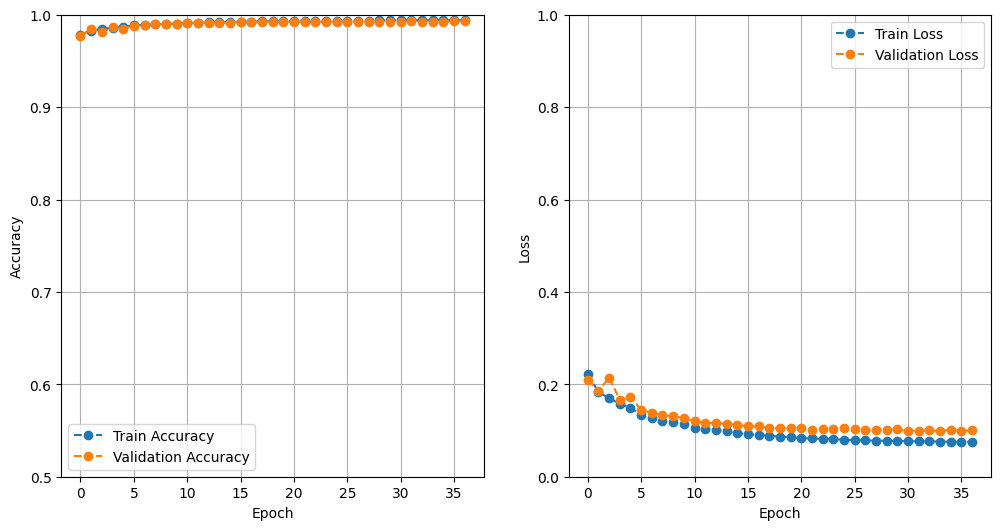

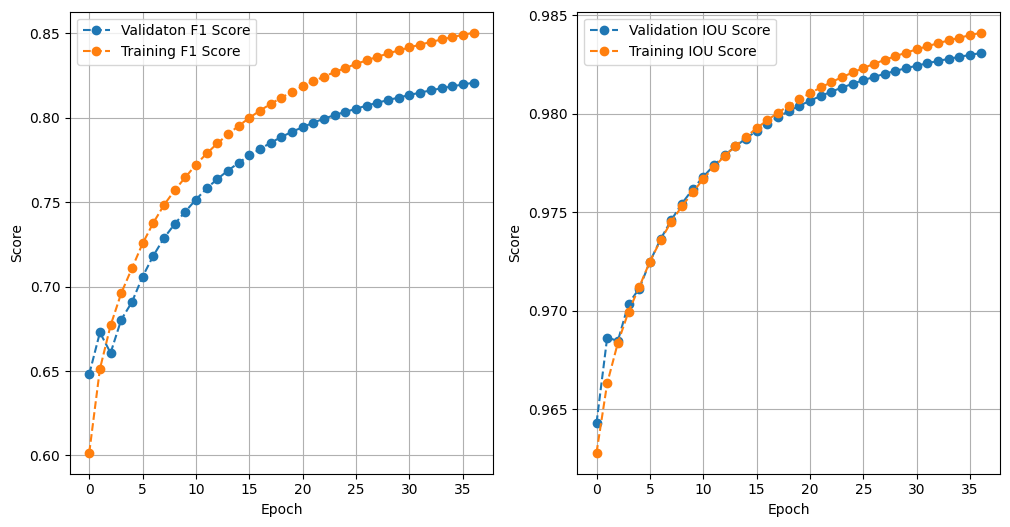

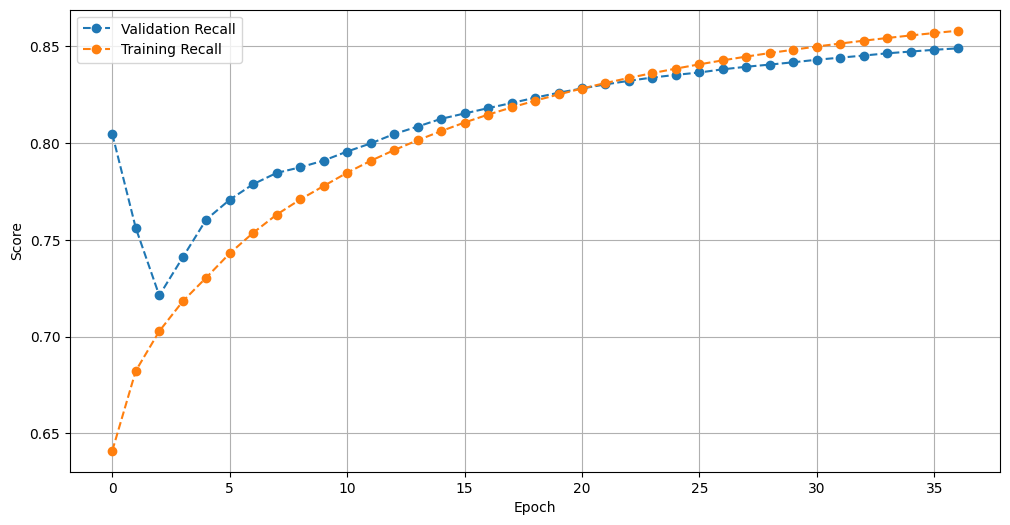

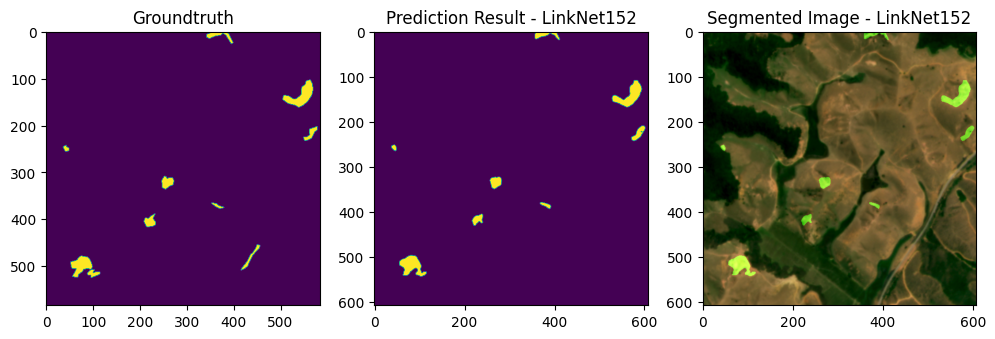

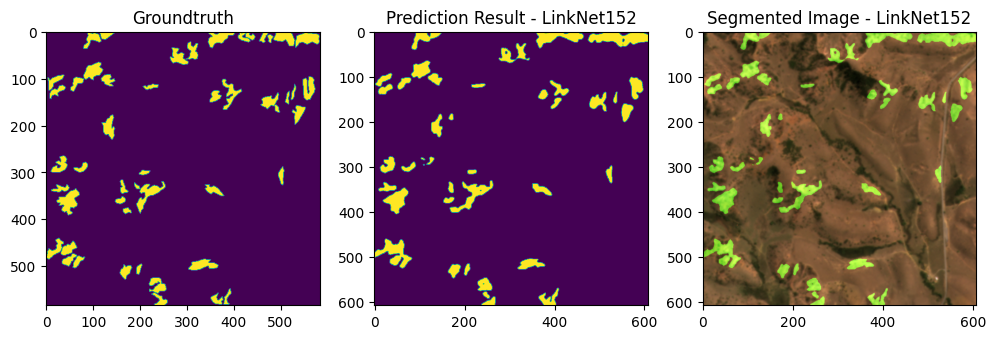

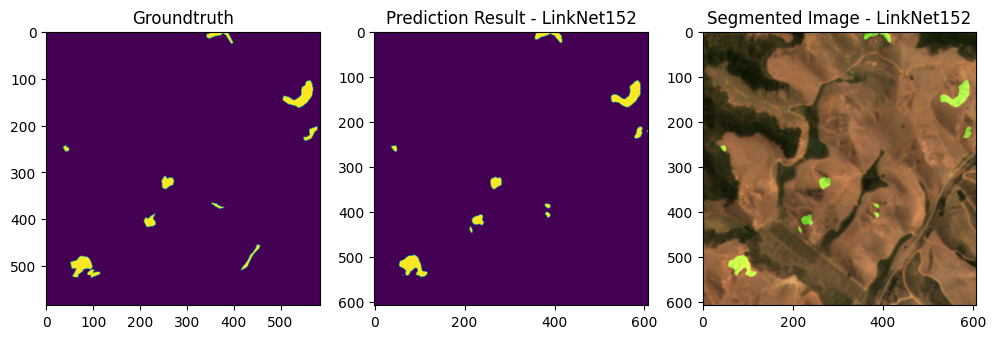

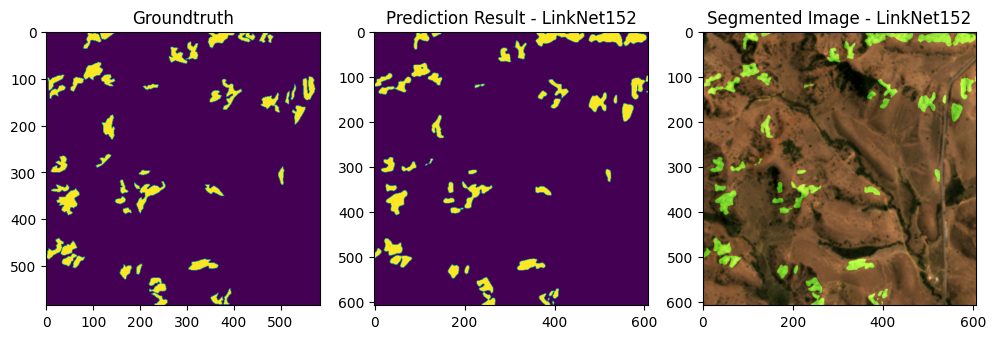

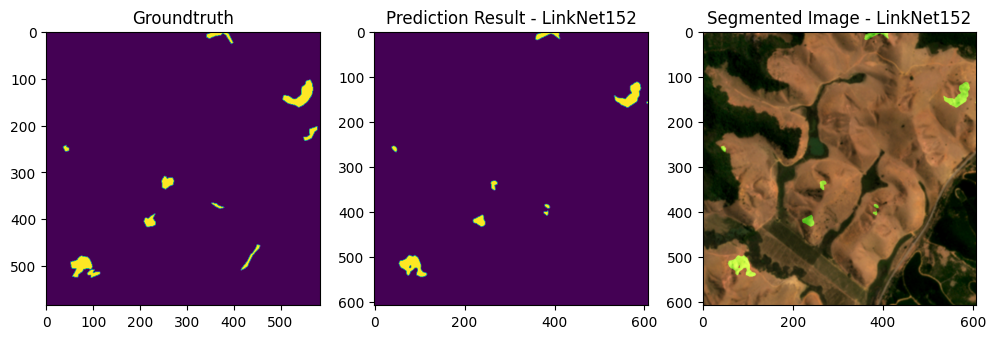

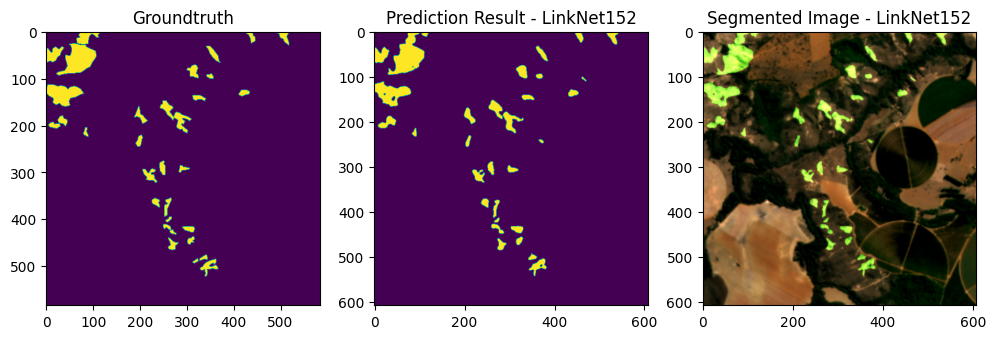

In [ ]:
# %%

if model_loading:
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

if model_training:
    train(
        model,
        training_generator,
        validation_generator,
        loss_func=BCEIoULoss(),
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=5,
    )

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)